In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder


df = pd.read_csv("Global_Pollution_Analysis.csv")

df['Total_Pollution_Index'] = (
    df['Air_Pollution_Index'] +
    df['Water_Pollution_Index'] +
    df['Soil_Pollution_Index']
)
df['Pollution_Severity'] = pd.qcut(
    df['Total_Pollution_Index'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

le_country = LabelEncoder()
le_year = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Year'] = le_year.fit_transform(df['Year'])

scaler = StandardScaler()
columns_to_scale = [
    'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
    'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
    'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
    'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)',
    'GDP_Per_Capita (in USD)', 'Total_Pollution_Index'
]
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

X_scaled = df_scaled.drop('Pollution_Severity', axis=1)
y_scaled = df_scaled['Pollution_Severity']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, stratify=y_scaled, random_state=42)


🔹 Naive Bayes Classification Report
              precision    recall  f1-score   support

        High       0.18      0.14      0.16        14
         Low       0.42      0.38      0.40        13
      Medium       0.24      0.31      0.27        13

    accuracy                           0.28        40
   macro avg       0.28      0.28      0.28        40
weighted avg       0.28      0.28      0.27        40



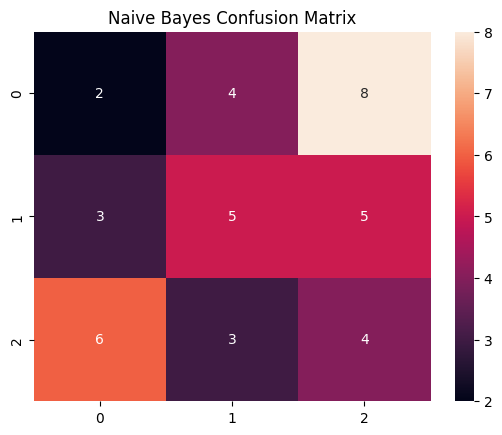

In [4]:

X_nb = df.drop('Pollution_Severity', axis=1)
y_nb = df['Pollution_Severity']
X_nb_train, X_nb_test, y_nb_train, y_nb_test = train_test_split(X_nb, y_nb, test_size=0.2, stratify=y_nb, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_nb_train, y_nb_train)
y_pred_nb = nb_model.predict(X_nb_test)

print("🔹 Naive Bayes Classification Report")
print(classification_report(y_nb_test, y_pred_nb))
sns.heatmap(confusion_matrix(y_nb_test, y_pred_nb), annot=True, fmt='d')
plt.title("Naive Bayes Confusion Matrix")
plt.show()



🔹 KNN (k=5) Classification Report
              precision    recall  f1-score   support

        High       0.50      0.57      0.53        14
         Low       0.67      0.77      0.71        13
      Medium       0.56      0.38      0.45        13

    accuracy                           0.57        40
   macro avg       0.57      0.58      0.57        40
weighted avg       0.57      0.57      0.57        40



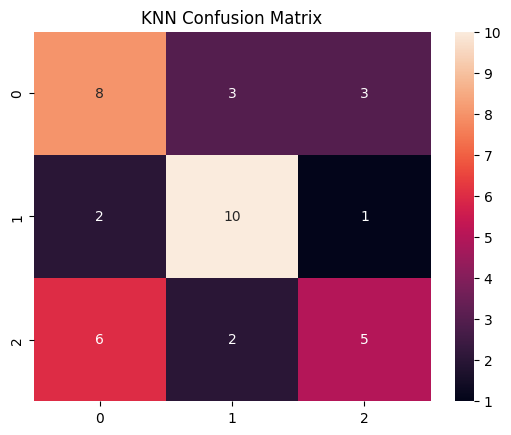

In [5]:

best_k = 1
best_score = 0
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print(f"\n🔹 KNN (k={best_k}) Classification Report")
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')
plt.title("KNN Confusion Matrix")
plt.show()



🔹 Decision Tree Classification Report
              precision    recall  f1-score   support

        High       1.00      0.93      0.96        14
         Low       1.00      1.00      1.00        13
      Medium       0.93      1.00      0.96        13

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40



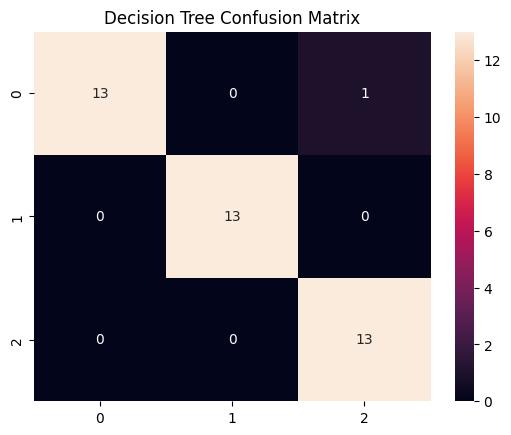

In [6]:
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\n🔹 Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [7]:

acc_nb = accuracy_score(y_nb_test, y_pred_nb)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_dt = accuracy_score(y_test, y_pred_dt)

print("🔸 Accuracy Comparison:")
print(f"Multinomial Naive Bayes: {acc_nb:.2f}")
print(f"KNN (k={best_k}): {acc_knn:.2f}")
print(f"Decision Tree: {acc_dt:.2f}")


🔸 Accuracy Comparison:
Multinomial Naive Bayes: 0.28
KNN (k=5): 0.57
Decision Tree: 0.97


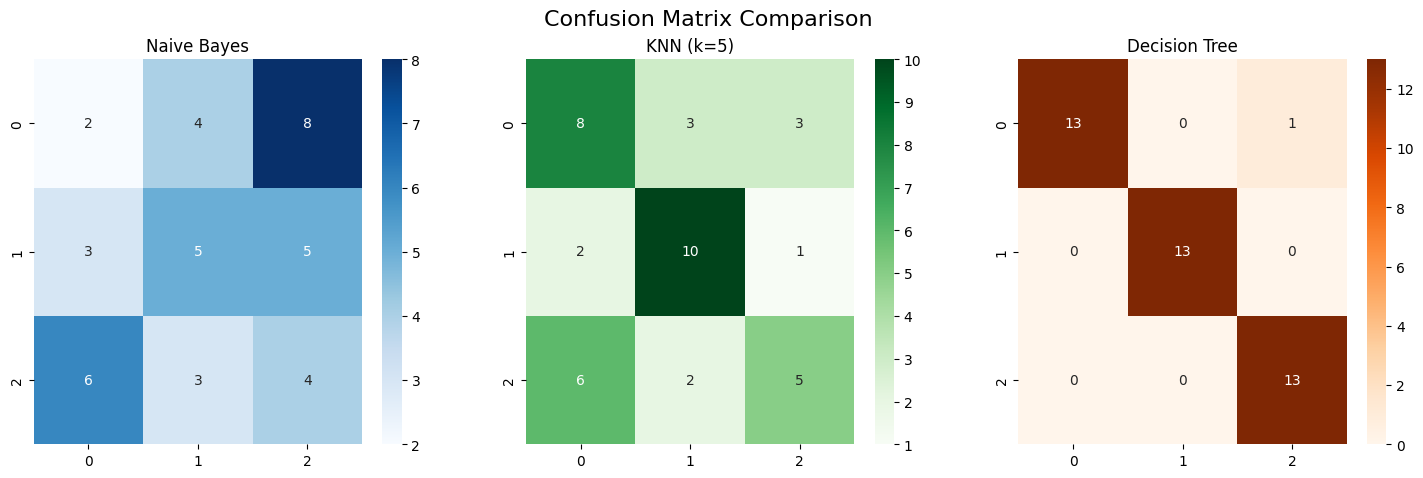

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(confusion_matrix(y_nb_test, y_pred_nb), annot=True, fmt='d', ax=axs[0], cmap="Blues")
axs[0].set_title("Naive Bayes")

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', ax=axs[1], cmap="Greens")
axs[1].set_title(f"KNN (k={best_k})")

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=axs[2], cmap="Oranges")
axs[2].set_title("Decision Tree")

plt.suptitle("Confusion Matrix Comparison", fontsize=16)
plt.show()


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

def get_scores(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='macro'),
        "Recall": recall_score(y_true, y_pred, average='macro'),
        "F1-Score": f1_score(y_true, y_pred, average='macro')
    }

summary = pd.DataFrame([
    get_scores(y_nb_test, y_pred_nb, "Naive Bayes"),
    get_scores(y_test, y_pred_knn, f"KNN (k={best_k})"),
    get_scores(y_test, y_pred_dt, "Decision Tree")
])

print(summary)


           Model  Accuracy  Precision    Recall  F1-Score
0    Naive Bayes     0.275   0.277926  0.278388  0.275556
1      KNN (k=5)     0.575   0.574074  0.575092  0.567388
2  Decision Tree     0.975   0.976190  0.976190  0.975309


## Key Insights

1. Countries with higher industrial waste and CO₂ emissions tend to fall in the "High" pollution severity class.
2. Renewable energy usage and per capita energy consumption have a notable inverse correlation with pollution levels.
3. Models suggest countries with higher GDP per capita and renewable energy % generally show lower pollution severity.



## Recommendations

- Invest in renewable energy sources and reduce reliance on fossil fuels.
- Enforce industrial waste treatment and CO₂ emission norms.
- Countries with low pollution levels can serve as policy models for others.